In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv,os,re
import sklearn
import numpy as np

In [2]:
df = pd.read_csv(r'lyrics_extended.csv')

In [3]:
df.head()

,song,artist,genre,lyrics,Unique_Word_Count,Type-Token Ratio,Sentiment Polarity,Word Density
0,ego-remix,beyonce-knowles,Pop,"Oh baby, how you doing?. You know I'm gonna cu...",159,0.367206,0.148268,9.640000
1,then-tell-me,beyonce-knowles,Pop,"playin' everything so easy,. it's like you see...",141,0.546512,0.115729,5.849057
2,honesty,beyonce-knowles,Pop,If you search. For tenderness. It isn't hard t...,119,0.700000,0.004720,4.072727
3,you-are-my-rock,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I. [Verse 1:]. If I wrote...",153,0.293103,0.407280,6.988506
4,black-culture,beyonce-knowles,Pop,"Party the people, the people the party it's po...",61,0.195513,-0.170833,10.424242


In [5]:
artist_polarity_group = df['Sentiment Polarity'].groupby(df['artist'])
artist_ttr_group = df['Type-Token Ratio'].groupby(df['artist'])

In [16]:
artist_polarity_mean = artist_polarity_group.describe()['mean']
artist_ttr_mean = artist_ttr_group.describe()['mean']

In [25]:
artist_mean_data = pd.concat([artist_polarity_mean,artist_ttr_mean],axis = 1)

In [29]:
artist_mean_vals = artist_mean_data.values

In [31]:
from sklearn.cluster import KMeans

#Judge the optimal number of clusters to use for the k-means algorithm by the elbow method
#Determine which value of number of clusters minimises the cost function

def get_optimal_k(a,b,data): #Determine cost function(i.e. inertia_ value) for clusters ranging from 2 to 10
    inertia_values = []
    for x in range(a,b+1):
        kmeans = KMeans(n_clusters=x, random_state=0).fit(data) #Train model with specified number of clusters
        inertia_values.append((x,kmeans.inertia_))
    return inertia_values

In [32]:
clustering_data = []


In [33]:
inertia_values = get_optimal_k(2,20,artist_mean_vals)

In [40]:

sorted(inertia_values,key = lambda x: x[1])
clustering_data.extend(inertia_values)

In [41]:
clustering_data = [(x,y/x) for (x,y) in clustering_data]
num_of_clusters = [x for (x,y) in clustering_data]
average_wss =[y for (x,y) in clustering_data]


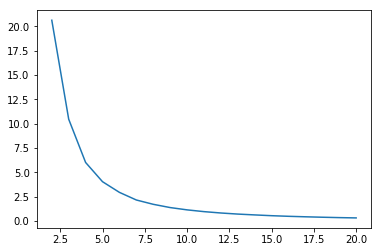

In [42]:
plt.plot(num_of_clusters,average_wss) #Elbow point curve suggest 5 is the optimal number of clusters

In [43]:
kmeans_artist = KMeans(n_clusters = 5, random_state = 0).fit(artist_mean_vals)

In [46]:
cluster_labels = kmeans_artist.labels_

In [48]:
np.bincount(cluster_labels)

array([ 728,  904, 1107, 1191, 1012], dtype=int64)